<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 경고 제거(판다스 error 메시지 무시)
import sys
import warnings

warnings.filterwarnings('ignore')

### 모델 평가

###  패키지 설치

In [ ]:
# 라이브러리 불러오기
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # boston(회귀 분석용)데이터등이 내재되어 있다.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # 자료 분리용
from sklearn.cluster import KMeans # KMeans알고리즘
from sklearn.svm import LinearSVR # 회귀 분석용 모델 - svr회귀모형
from sklearn.svm import LinearSVC # 분류 분석용 모델 - svm분류기
from sklearn.linear_model import LinearRegression # 선형회귀모형

from sklearn.datasets import fetch_openml # 분류용 데이터 준비

np.random.seed(42) # 일관된 출력위해 유사난수 초기화

# 시각화 라이브러리 맷플롯립 설정
%matplotlib inline

### 분류 예제

In [ ]:
# 아래의 코드(fetch_opennml)이 정상적으로 작동하지 않을 경우 scikit-learn 버전문제로 추측되며
# 그 때, 아래의 코드를 통하여서 데이터를 불러 들이면 됩니다.
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')
# mnist

In [ ]:
mnist = fetch_openml('mnist_784',version=1)
X, y = mnist["data"], mnist["target"]
# X에는 사람이 직접 쓴 손글씨가, y에는 그것이 실제 어떤 숫자인지 정보가 들어있다.

In [ ]:
y[0:5] # 라벨인 y값이 문자(string)형으로 되어있다.

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [ ]:
print(X.shape)        # 각 픽셀의 색깔(강도)이 개별 특성을 나타냄. 
print(y.shape)        # 실제 숫자 이미지 정답

(70000, 784)
(70000,)


+ reshape함수

배열(numpy의 ndarray 타입)의 구조를 원하는 대로 바꿀 수 있는 함수이다.

Ex) reshape(3,4)면 3x4형태의 배열로 구조를 바꾸겠다는것.

In [ ]:
y = y.astype(np.int)  # y값을 정수형 값으로 변환하겠음.

In [ ]:
print(type(X.iloc[0,:]),type(X.iloc[0,:].values)) # ※참고용. X와 X.values의 타입이 다르다.

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


(-0.5, 27.5, 27.5, -0.5)

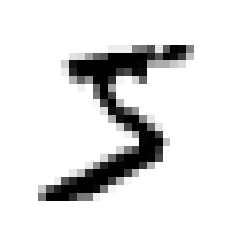

In [ ]:
some_digit=X.iloc[0,:] # 첫번째 사진데이터 확인해보겠다.

some_digit_image = some_digit.values.reshape(28,28) # (784,)배열의 구조를 (28x28)로 바꾸겠다.

plt.imshow(some_digit_image, cmap="binary")  #회색음영을 위해 cmap은 binary로 지정
plt.axis("off") # 모든 axis값(축)을 제거하는 옵션("off") 부분제거도 가능

In [ ]:
# slice방식으로 분리하겠다.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [ ]:
print(f'학습용 train의 길이는 {len(X_train)}, 학습용 test의 길이는 {len(y_train)}')
print(f'평가용 train의 길이는 {len(X_test)}, 평가용 test의 길이는 {len(y_test)}')

학습용 train의 길이는 60000, 학습용 test의 길이는 60000
평가용 train의 길이는 10000, 평가용 test의 길이는 10000


### 이진 분류기 생성( 숫자가 5인가 아닌가만을 구분 )

In [ ]:
y_train_5 = (y_train == 5) # 라벨값5만 True, 나머지 False
y_test_5 = (y_test==5)     # test용 자료에도 동일하게 처리해야한다.

In [ ]:
svm_clf = LinearSVC() # 선형SVM분류기
svm_clf.fit(X_train, y_train_5)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [ ]:
svm_clf.predict([some_digit]) # 이미지 5를 실제로 올바르게 예측했다.

array([ True])

# 3.3 성능 측정

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_clf,X_train, y_train_5, scoring="accuracy",cv=3)
# 분류문제는 기본적으로 accuracy매개변수를 사용해서 정확도 측정한다.
print(scores) #정확도가 매우 높다.

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.93465 0.96055 0.9599 ]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 정확도 지표의 단점(편향적인 모델도 성능 좋게 나올수가 있다)

In [ ]:
#무조건 5가 아니라고 예측하는 모델(현재 Dataset의 label중 10%만이 5이고 나머지 90%는 5가 아니다.)
from sklearn.base import BaseEstimator 
class Never5Classifier(BaseEstimator):          
  def fit(self, X, y=None): 
    return self
  def predict(self, X):
    return np.zeros((len(X),1),dtype=bool) # Data인풋 크기만큼 받아서 다 0만을 반환하는 배열 

In [ ]:
Bad_clf = Never5Classifier()
scores = cross_val_score(Bad_clf,X_train, y_train_5, scoring="accuracy",cv=3)
print(scores) # 이 또한 정확도가 매우 높다.

[0.91125 0.90855 0.90915]


### 오차행렬(Confusion matrix)

In [ ]:
from sklearn.model_selection import cross_val_predict # ※교차검증 예측값을 결과값으로 반환한다.
y_train_pred = cross_val_predict(svm_clf, X_train, y_train_5, cv=3) # 5냐 아니냐 판단하는 모델

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) #실제 타깃벡터, 해당예측값
#오차행렬의 행=실제클래스 // 열=예측한클래스 

array([[52068,  2511],
       [ 1002,  4419]], dtype=int64)

In [ ]:
# y_train_pred = svm_clf.predict(X_train) # 혹은 이 값을 예측값으로 사용해서 넣어봐도 된다.

https://yamalab.tistory.com/50 참고

### 정밀도와 재현율

In [ ]:
from sklearn.metrics import precision_score, recall_score #정밀도, 재현율
print(precision_score(y_train_5,y_train_pred)) #정밀도 66% 5로 판별한것중 66%만 5이다.
print(recall_score(y_train_5,y_train_pred)) #재현율 80% 실제5중에 80%만 제대로 감지했다.

0.8006586169045006
0.6727541044087807


### F1-Score

In [ ]:
# F1점수 (정밀도와 재현율의 조화평균!)
# 2 / [(1/정밀도) + (1/재현율)]
from sklearn.metrics import f1_score #두 분류기를 비교할때 f1점수 자주쓰임.(정밀도 재현도 다 고려하기 위해)
f1_score(y_train_5,y_train_pred) #정밀도와 재현율이 비슷할수록 1에 가까워 진다.

0.7311547714514836

+ 정밀도 - 예측을 했을떄 그 예측이 믿을만한 정도

정밀한 분류기는 상황이 '정말 확실할때'만 양성으로 감지한다.

+ 재현율 - 실제 값들중 정말로 실제라고 감지된 비율.

'재현율높은' 분류기는 '조금만 수상해도' 양성으로 감지한다. 

### ROC 곡선

+ decision_function?

주어진 X값에 대하여 어떤 label로 분류할지 예측값마다 점수를 부여한다.
아래의 예시에선 0을 기점으로, 양수는 양성(5이다) 음수는 음성(5가 아니다)로 예측.

이때, 0을 분류에서의 '임계점'(thresholds)이라고 할 수 있음.

In [ ]:
y_scores = cross_val_predict(svm_clf, X_train, y_train_5, cv=3,
                                 method = "decision_function")

In [ ]:
from sklearn.metrics import roc_curve # ROC곡선을 위한 함수
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) #roc커브결과값, 거짓양성비, 진짜양성비, 임곗값을 저장

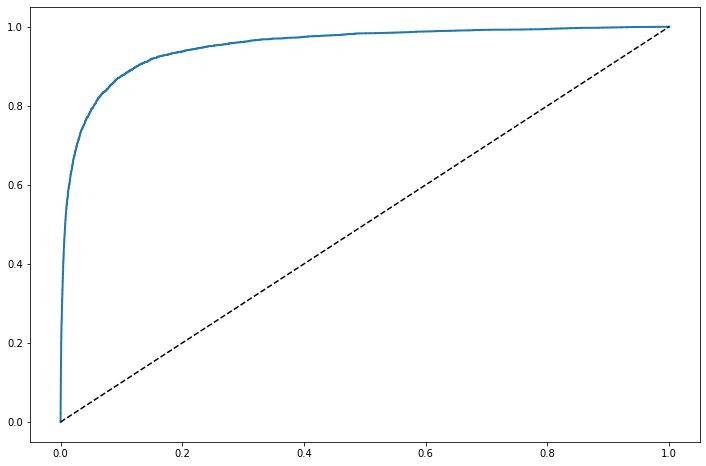

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  
plt.figure(figsize=(12,8))
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores) #AUC값 (면적)계산

0.9536789698168869

### 회귀 실습

In [ ]:
# boston 데이터 load
boston_data = datasets.load_boston() 

# boston feature
boston_feature = boston_data.data

# boston target
boston_target = boston_data.target

# boston 데이터 DataFrame변환
boston = pd.DataFrame(boston_data.data, columns = boston_data.feature_names)

# boston target변수 (주택가격 )
boston['PRICE'] = boston_data.target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(boston_feature) 

# train:test = 0.8:0.2
x_train, x_test, y_train, y_test = train_test_split(X, boston_target,
                                                   test_size = 0.2, random_state = 21)

In [ ]:
print(f'학습용 train의 길이는 {len(x_train)}, 학습용 test의 길이는 {len(y_train)}')
print(f'평가용 train의 길이는 {len(x_test)}, 평가용 test의 길이는 {len(y_test)}')

학습용 train의 길이는 404, 학습용 test의 길이는 404
평가용 train의 길이는 102, 평가용 test의 길이는 102


In [ ]:
# 회귀모델 평가지표 생성

# MSE
def mean_squared_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean((y_true - y_pred)**2)

# RMSE
def root_mean_squared_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.sqrt(np.mean((y_true - y_pred)**2))

# MAE
def mean_absolute_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)))

# MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
reg = LinearRegression() # 하이퍼 파라미터 튜닝은 생략한다.
svr = LinearSVR()
kmean = KMeans()

models = [reg, svr, kmean] # 사용 모델 리스트
model_names = ['Linear Regression', 'LinearSVR', 'KMeans'] # 사용 모델 이름
evaluate = [mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,root_mean_squared_error]#평가 지표 이름
scores = {} # 점수 저장 목록 

# 각 평가 지표별, 모델별 점수 출력
for eval in evaluate: # 평가 지표 갯수만큼 반복
  print(eval)
  for ind, mod in enumerate(models): # enumerate -> List에서 index,value 총 2개를 출력해준다.(각각 ind,mod에 저장)
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    score = eval(y_test, y_pred)  
    scores[model_names[ind]] = score
    if ind==2:
      print(scores)

<function mean_absolute_error at 0x0000000093D97948>
{'Linear Regression': 3.66446242569901, 'LinearSVR': 3.274517711699858, 'KMeans': 18.062745098039215}
<function mean_squared_error at 0x00000000E65DED38>
{'Linear Regression': 26.825400573939326, 'LinearSVR': 26.675213966262035, 'KMeans': 486.3433333333333}
<function mean_absolute_percentage_error at 0x0000000100961318>
{'Linear Regression': 18.8684722584717, 'LinearSVR': 16.611692969220453, 'KMeans': 82.52905245551868}
<function root_mean_squared_error at 0x00000000E65DEE58>
{'Linear Regression': 5.179324335658014, 'LinearSVR': 5.163775354901735, 'KMeans': 21.846483092923943}
